In [5]:
import hkvfewspy as fews
import pandas as pd

In [2]:
pi = fews.Pi()

In [3]:
pi.setClient('http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl')

In [22]:
query = pi.setQueryParameters()

In [32]:
query.parameterIds(['k.m3.gebaggerd.mars'])
query.locationIds(['bv.1.7.2.3.2'])
query.startTime(pd.datetime(2019,1,1))
query.endTime(pd.datetime(2019,2,1))

In [33]:
query.query

{'clientTimeZone': 'Etc/GMT',
 'convertDatum': False,
 'forecastSearchCount': 0,
 'importFromExternalDataSource': False,
 'omitMissing': False,
 'onlyHeaders': False,
 'onlyManualEdits': False,
 'showEnsembleMemberIds': False,
 'showLocationAttributes': False,
 'showStatistics': False,
 'showThresholds': False,
 'useDisplayUnits': True,
 'version': '1.22',
 'parameterIds': ['k.m3.gebaggerd.mars'],
 'startTime': datetime.datetime(2019, 1, 1, 0, 0),
 'locationIds': ['bv.1.7.2.3.2'],
 'endTime': datetime.datetime(2019, 2, 1, 0, 0)}

In [34]:
df = pi.getTimeSeries(query)

In [38]:
df.value.mask(df.flag == 8, inplace=True)
df.head()

,moduleInstanceId,qualifierId,parameterId,units,locationId,stationName,flag,value
date,,,,,,,,
2018-12-31 23:00:00+00:00,pr.Reizen.mars.baggeracties,,k.m3.gebaggerd.mars,m3,bv.1.7.2.3.2,Blauwe Slenk,8,NaN
2019-01-01 23:00:00+00:00,pr.Reizen.mars.baggeracties,,k.m3.gebaggerd.mars,m3,bv.1.7.2.3.2,Blauwe Slenk,0,2048.3
2019-01-02 23:00:00+00:00,pr.Reizen.mars.baggeracties,,k.m3.gebaggerd.mars,m3,bv.1.7.2.3.2,Blauwe Slenk,0,2361.74
2019-01-03 23:00:00+00:00,pr.Reizen.mars.baggeracties,,k.m3.gebaggerd.mars,m3,bv.1.7.2.3.2,Blauwe Slenk,0,1993.37
2019-01-04 23:00:00+00:00,pr.Reizen.mars.baggeracties,,k.m3.gebaggerd.mars,m3,bv.1.7.2.3.2,Blauwe Slenk,0,2648.67


In [36]:
import altair as alt

C:\ProgramData\Miniconda3\lib\site-packages\altair\utils\core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


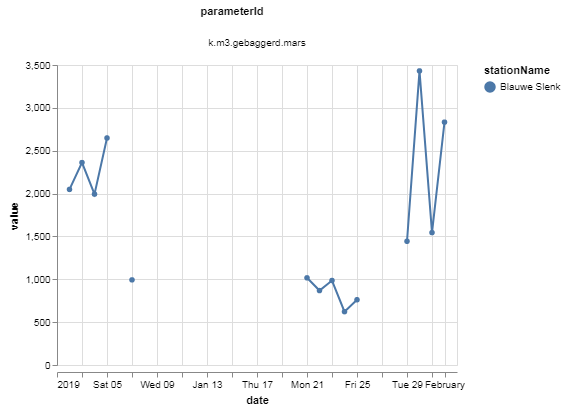

In [39]:
line_chart = alt.Chart(df.reset_index()).mark_line(point=True).encode(
    x='date',
    y='value',
    color='stationName',
    tooltip = ['value', 'stationName', alt.Tooltip('date:T', format = '%Y-%m-%d')]
).facet(
    column='parameterId',
).resolve_scale(
    y='independent'
).interactive(bind_y=False)

line_chart

In [11]:
df.plot()